# **Exploratory Data Analysis using the Titanic dataset**

# Introduction

Exploratory data analysis (EDA) is a crucial step in the data analysis/science process. Improper EDA can have significant consequences on analysis if not done properly like inaccurate results, missed insights, and poor decision making. In a professional setting, this can translate to wasted resources and potentially monetary losses. EDA can be described as a process to analyze and summarize a dataset (1). The importance of EDA can be summarized by IBM (2):
>“The main purpose of EDA is to help look at data before making any assumptions. It can help identify obvious errors, as well as better understand patterns within the data, detect outliers or anomalous events, find interesting relations among the variables.”

EDA is critical is to better understand the data and data quality. This step allows the data to communicate itself in a way that may not have been obvious. For instance, it can reveal a non-obvious relationship between two features. EDA increases the understanding of the data and the data quality which, in turn, will yield better analysis.
EDA is a big task regardless of the size of the data. There are many versions of EDA. One source described a nine step process (2), another had four steps (3),  and one had three steps (4). There is no clear process, and this can make EDA quite difficult especially for beginners, but there are goals that can guide us. It is important to note that EDA is an iterative process, not a linear one. In this blog post, I will describe the general goals of EDA: Understanding the data, data cleaning, and feature analysis using samples from Titanic dataset from Kaggle.

Why Titanic dataset?
- The dataset is readily available and is a good starter dataset to learn fundamentals without getting too bogged down in the actual dataset. In other words, it is an easy dataset. It is also messy and allows us to practice data cleaning.


*Note: The goals decribed are not accomplished in isolation. They should work in tandem. For example, you are performing Feature Analysis in Data Understanding when detecting outliers with histograms and outliers. The goal is to illustrate how one might go about performing EDA on a dataset*

*Rule of Thumb: Check your work as you make changes to your dataset. If you change a data type, drop a column, or feature engineer, make sure you make sure the changes are actually being made. Remove outliers? Check the histograms and boxplots again*

## Data Understanding/Overview

I always like to keep my raw data separate, thus the first step to understanding the data is to make a copy of the data. This copy will be used for all analysis. The goal in this step is to obtain a birds-eye view of the data - shape, datatypes, feature names, presence of duplicates, null values, and outliers. A better understanding of the data will lead to better questions and research. Below are some code snippets I like to use to better understand my data at hand.

### Load the data

In [1]:
#import libraries
import pandas as pd #data analysis and manipulation
import numpy as np #math manipulation if required
from scipy import stats #stat tests
from statsmodels.graphics.gofplots import qqplot # for qq plots

#for visuals
import matplotlib.pyplot as plt 
import seaborn as sns

In [11]:
#load data and make copy for all analysis
data = pd.read_csv('tested.csv')
copy = data.copy()

### Data Overview

In [3]:
#get the size of the dataframe (rows, columns)
copy.shape

(418, 12)

In [4]:
#get feature names and data types, has other information as well like number of non-nulls and size of dataframe
copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
#get summary statistics for numerical columns
copy.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [5]:
#summary for numeric features
copy.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
#get a sample of the data to visualize what contents may look like
#can do copy.tail() too #bottom 5
copy.head() #top 5

#you can also perform copy.sample(n) where n is the number of samples you want back. This is random


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


The following code blocks indicate the number of nulls per column, the percent of nulls per column, and the total number of duplicates in our data.
We can see there are nulls in Age (20.5%), Cabin (78%), and less than one percent for Fare. 

In [6]:
#number of nulls per feature
copy.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [4]:
# % of nulls per column

copy.isnull().sum() * 100 / len(copy)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [7]:
#number of duplicates in the df
copy.duplicated().sum()

0

Let's identify outliers using boxplots and histograms - For simplicity we only do Age and Fare as they have the biggest range as noted by `copy.describe()` above. I will also put them on one subplot.
*Note: It is important to do this for all numerical columns*

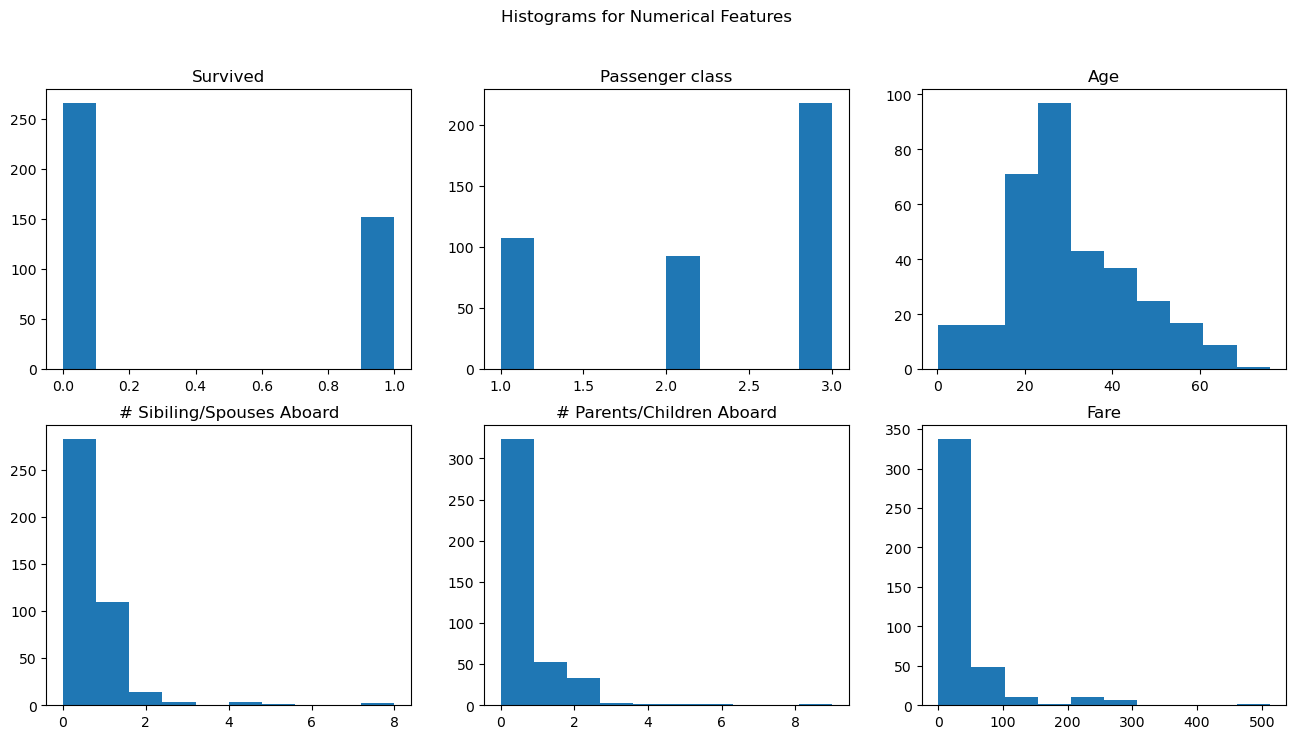

In [23]:
#get numerical features
numerical_features = list(copy.select_dtypes(['int', 'float']).columns)

#function to plot histograms
def plot_histogram(dataframe, features, num_rows, num_cols, fig_size):
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=fig_size)
    for i in range(num_rows):
        for j in range(num_cols):
            idx = i * num_cols + j #get index position
            feature = features[idx]
            axs[i, j].hist(dataframe[feature])
            axs[i, j].set_title(feature)
    plt.suptitle('Histograms for Numerical Features')
    plt.show()

#plot histograms
plot_histogram(copy, numerical_features, 2, 3, (16, 8))

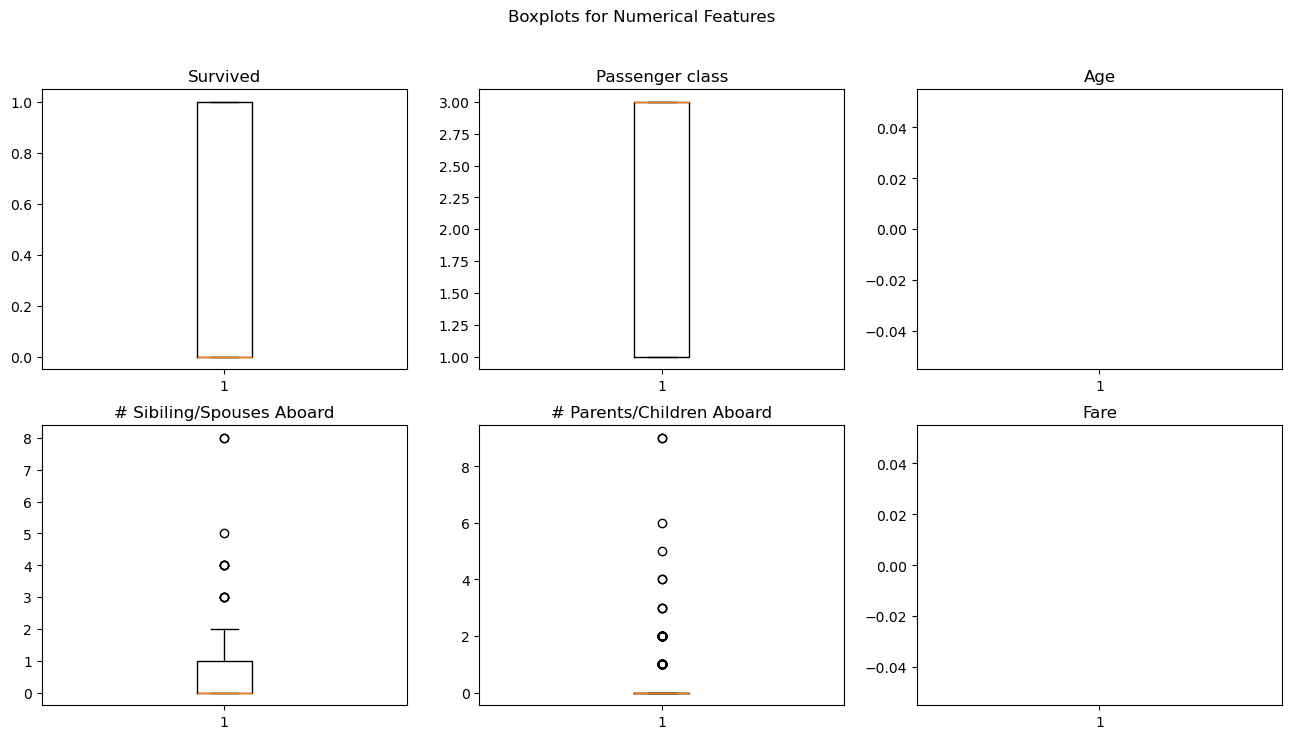

In [27]:
#plot box plots
def plot_boxplots(dataframe, features, num_rows, num_cols, fig_size):
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=fig_size)
    for i in range(num_rows):
        for j in range(num_cols):

            idx = i * num_cols + j
            feature = features[idx]
            axs[i, j].boxplot(dataframe[feature])
            axs[i, j].set_title(feature)
    
    plt.suptitle('Boxplots for Numerical Features')
    plt.show()

plot_boxplots(copy, numerical_features, 2, 3, (16, 8))

Because we have nulls in Age and Fare, axs[i, j].boxplot() (equivalent to plt.boxplot()) the boxplot doesn't appear. using plt.boxplot give us more control on how deal with nulls manually. 

sns.boxplot is able to automatically deal with null values.

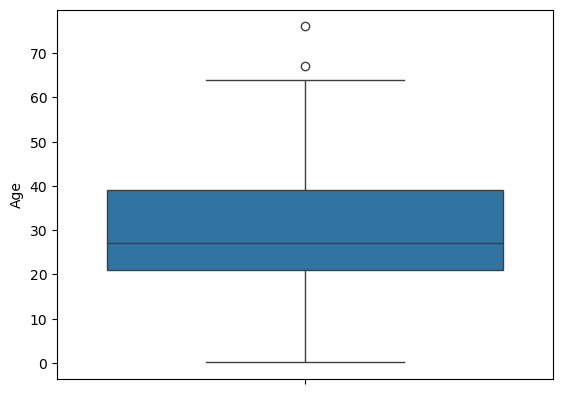

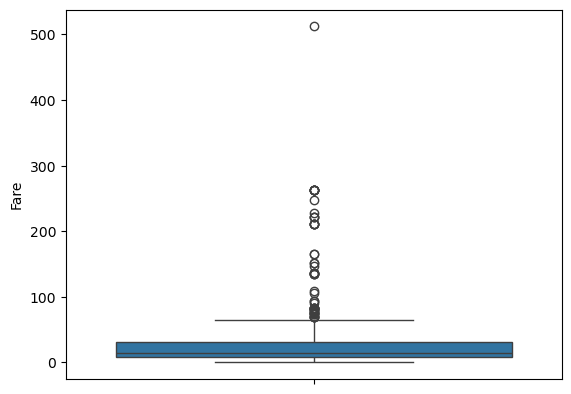

In [9]:
#make boxplots for age and fair
sns.boxplot(copy['Age']) #handles nulls
plt.show()
sns.boxplot(copy['Fare'])
plt.show()

At the end of the Data Understanding/Overview phase, you should be able to understand/identify the following:
- size of dataframe,
- feature names and data types
- duplicates, if any
- nulls in each feature
- data distribution
- outliers
- Cleaning or formatting

It is important to assess the values and feature/column names of the dataframe as well. Do they make sense? Are there Abbreviations? if so, what do they stand for? Are Feature names decribing the feature?

The idea is to get a general understanding of the data before any manipulations are performed or hypothesis is developed. This stage will also identify data cleaning and formatting steps. 

# Data Cleaning and Formatting

This step aims to increase the data integrity. Data issues can be duplicates, nulls, and outliers. Duplicates are relatively easy to clean as they can be dropped, but nulls and outliers are more difficult. Nulls and outliers require a bit more attention as there are multiple ways to manage them and the ‘best’ way depends on the data and question at hand. For this reason, an introduction, but not a deep dive will explained on how to deal with nulls and outliers. This step also includes changing data types and feature names

### Data Cleaning

In [12]:
#get portion of data
copy.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
318,1210,0,3,"Jonsson, Mr. Nils Hilding",male,27.0,0,0,350408,7.8542,NaN,S
345,1237,1,3,"Abelseth, Miss. Karen Marie",female,16.0,0,0,348125,7.6500,NaN,S
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
112,1004,1,1,"Evans, Miss. Edith Corse",female,36.0,0,0,PC 17531,31.6792,A29,C
365,1257,1,3,"Sage, Mrs. John (Annie Bullen)",female,NaN,1,9,CA. 2343,69.5500,NaN,S


Luckily, this dataset has documentation that we can use to better understand the data. As we can see though, there may be some column names and values that don't necessarily make sense. So, let's change those as well.

In [12]:
# change feature to string not number
copy['PassengerId'] = copy['PassengerId'].astype(str)

#change column names to full names as per documentation
copy = copy.rename(columns={'SibSp': '# Sibiling/Spouses Aboard', 'Parch': '# Parents/Children Aboard', 'Pclass': 'Passenger class'})

#dictionary for changing embarked values
embarked_dict = {'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southhampton'}

#change the Embarked values to full names
copy['Embarked'] = copy['Embarked'].replace(embarked_dict)

#check work
copy.head()

,PassengerId,Survived,Passenger class,Name,Sex,Age,# Sibiling/Spouses Aboard,# Parents/Children Aboard,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Queenstown
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,Southhampton
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Queenstown
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,Southhampton
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,Southhampton


Fantastic. I like to do these changes as it helps me better understand the data.

### Nulls

We had some nulls from earlier that we should handle before dealing with outliers. 

Nulls can be dropped or filled with another value (eg. median). The best method depends on your data and the question you want to answer.

#### Dropping nulls

Dropping should only be used as a last resort or quick and dirty analysis.

Nulls can be dropped by row or column/feature. 

Dropping by rows should be reserved for large datasets or if removal will result in a little to no data loss.

Dropping by feature is when there are too many nulls. 

In [15]:
#number of nulls per feature
copy.isnull().sum()

# % of nulls per column

copy.isnull().sum() * 100 / len(copy)

PassengerId                   0.000000
Survived                      0.000000
Passenger class               0.000000
Name                          0.000000
Sex                           0.000000
Age                          20.574163
# Sibiling/Spouses Aboard     0.000000
# Parents/Children Aboard     0.000000
Ticket                        0.000000
Fare                          0.239234
Cabin                        78.229665
Embarked                      0.000000
dtype: float64

In [16]:
#make a copy
no_nulls = copy.copy()

#drop nulls by row - if null exists row dropped
no_nulls = no_nulls.dropna()

#calc data loss
new_size = no_nulls.shape[0]
old_size = copy.shape[0]
loss = ((new_size / old_size) - 1) * 100
loss

-79.18660287081339

So we lost 79% of our data here and this is not a suitable approach here.

In [22]:
#drop nulls for specifc feature by row
#make a copy
no_nulls = copy.copy()

#drop nulls in Age and Fare
no_nulls = no_nulls.dropna(axis=0, subset=['Age', 'Fare'])

#calc data loss
new_size = no_nulls.shape[0]
old_size = copy.shape[0]
loss = ((new_size / old_size) - 1) * 100
loss


-20.813397129186605

Dropping the nulls in only Age and Fare results in a 20% loss. Not great, so these will have to be filled in.

We can drop Cabin as filling in 78% of the feature is not worth it - just drop it. Also, it helps that the feature is somewhat irrelevant to the research question - predict survival.

In [13]:
#drop cabin as a feature - too many nulls
copy = copy.drop('Cabin', axis=1)

In [5]:
#check
copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                418 non-null    object 
 1   Survived                   418 non-null    int64  
 2   Passenger class            418 non-null    int64  
 3   Name                       418 non-null    object 
 4   Sex                        418 non-null    object 
 5   Age                        332 non-null    float64
 6   # Sibiling/Spouses Aboard  418 non-null    int64  
 7   # Parents/Children Aboard  418 non-null    int64  
 8   Ticket                     418 non-null    object 
 9   Fare                       417 non-null    float64
 10  Embarked                   418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


#### Imputing Nulls

fill in Age and Fare nulls

Mean and median imputation are common, but be aware the impact of outliers in the data. Mean is more sensitive to outliers

In [15]:
copy['Age'].median()

27.0

In [16]:
# median or mean imputation

copy['Age'] = copy['Age'].fillna(copy['Age'].median())

copy['Fare'] = copy['Fare'].fillna(copy['Fare'].median())

#check
copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                418 non-null    object 
 1   Survived                   418 non-null    int64  
 2   Passenger class            418 non-null    int64  
 3   Name                       418 non-null    object 
 4   Sex                        418 non-null    object 
 5   Age                        418 non-null    float64
 6   # Sibiling/Spouses Aboard  418 non-null    int64  
 7   # Parents/Children Aboard  418 non-null    int64  
 8   Ticket                     418 non-null    object 
 9   Fare                       418 non-null    float64
 10  Embarked                   418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


Alternatively, you can use some methods from the sci-kit learn library. We will not go over those, but you should know they exist.

### Outliers

Outliers are important to detect and handle as they can skew the data and any analysis. The simplest method is to remove them (8) with the use the Standard Deviation or Inter-Quartile Range methods(15), but you can replace it with the median or mean values (9). Finally, you can use transformation techniques like log transformation (8). Alternatively, if the outlier is due to collection methods, it may be better to use a more robust approach.

We need to deal with our nulls and outliers - we have no duplicates. Remember `copy.isnull().sum()` and the histograms we made above?

Can use Z - score (normal) or IQR method (non-normal)

This is one of the reasons why it is important to understand the data distribution.

#### Removing Outliers

Again, removing data should always be a last resort or if the data loss is minimal. It is important to consider how and why the outlier is there. 

In [18]:
#make copy
no_outliers = copy.copy()

#numeric features
numeric_features = list(no_outliers.select_dtypes(['int', 'float']).columns)

#Removing outlier
Q1 = no_outliers[numeric_features].quantile(0.25)
Q3 = no_outliers[numeric_features].quantile(0.75)
IQR = Q3 - Q1

no_outliers = no_outliers[~((no_outliers[numeric_features] < (Q1 - 1.5 * IQR)) | (no_outliers[numeric_features] > (Q3 + 1.5 * IQR))).any(axis=1)]

#calc loss from outlier loss
new_size = no_outliers.shape[0]
old_size = copy.shape[0]
loss = ((new_size / old_size) - 1) * 100
loss

-32.77511961722488

Removing outliers resulted in a 32% loss of our data. Filling nulls is crucial, especially if the dataset is small like this one.

#### Methods to handle Outliers

- Winsorization
- Log Transform
- Box-cox or Yeo-Johnson

In [20]:
copy.head()

,PassengerId,Survived,Passenger class,Name,Sex,Age,# Sibiling/Spouses Aboard,# Parents/Children Aboard,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Queenstown
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,Southhampton
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Queenstown
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,Southhampton
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,Southhampton


In [181]:
#Round Fare to two decimal places
copy['Fare'] = copy['Fare'].round(2)
copy.head()

,Survived,Passenger class,Sex,Age,Fare
0,0,3,male,34.5,7.83
1,1,3,female,47.0,7.00
2,0,2,male,62.0,9.69
3,0,3,male,27.0,8.66
4,1,3,female,22.0,12.29


## Feature Analysis

## Statistical tests

There is a lot you can do here and it can be overwhelming, but here are some general goals:
- Break down by certain categories - e.g. age, sex/gender, outcome(survived or not) etc.,
- Use average values where appropriate e.g. what was the average age of survivors,
- explore the relationships among features - ideally you have dropped some columns as this step can become quite large,
- You really want to explore the features individually then in pairs.

Now that we have the features we are interested in we can explore the data a bit. From the graphs below we can see the count of Males and Females, those who survived and those who did not. 
*Note: Histograms and boxplots are part of feature analysis, but we did that in the Data Understanding phase. Remember, EDA is iterative, not linear.*

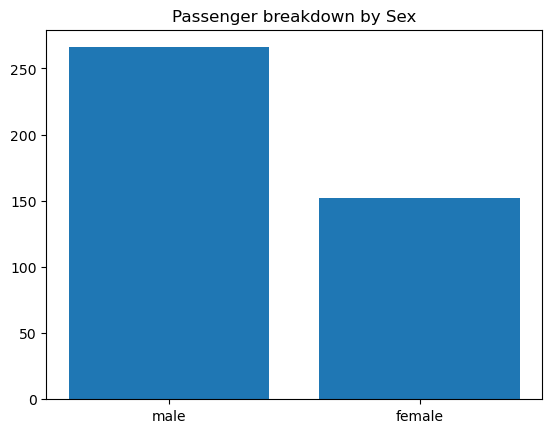

In [22]:
#breakdown of sex
X = copy['Sex'].value_counts().index
y = copy['Sex'].value_counts().values

#plot
plt.bar(X, y)
plt.title('Passenger breakdown by Sex')
plt.show()


In [36]:
#breakdown of survived or not by gender
#0 = dead
copy[(copy['Sex'] == 'male') & (copy['Survived'] == 1)]

,PassengerId,Survived,Passenger class,Name,Sex,Age,# Sibiling/Spouses Aboard,# Parents/Children Aboard,Ticket,Fare,Embarked


<Axes: xlabel='Passenger class'>

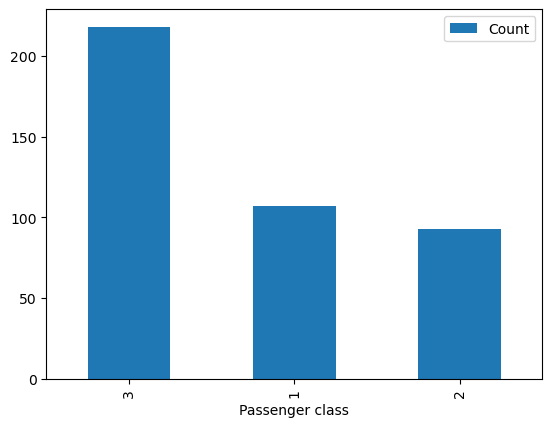

In [130]:
passenger_class_count = pd.DataFrame(copy['Passenger class'].value_counts())
passenger_class_count = passenger_class_count.reset_index().rename(columns={'index': 'Passenger class', 'Passenger class': 'Count'})
passenger_class_count.plot.bar(x='Passenger class', y='Count')


<Axes: xlabel='Passenger class', ylabel='survival_rate'>

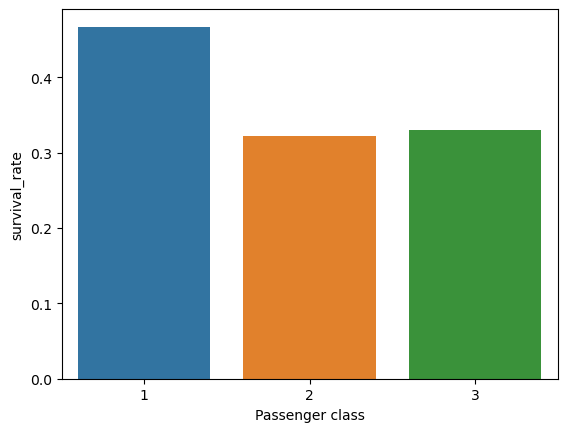

In [151]:
# Group the data by passenger class and survival status
grouped = copy.groupby(['Passenger class', 'Survived']).size().reset_index(name='count')

# Calculate the survival rate for each passenger class
survival_rate = grouped.pivot(index='Passenger class', columns='Survived', values='count')
survival_rate['total'] = survival_rate.sum(axis=1)
survival_rate['survival_rate'] = survival_rate[1] / survival_rate['total']

# Plot the survival rate per passenger class
sns.barplot(x=survival_rate.index, y='survival_rate', data=survival_rate)

<Axes: >

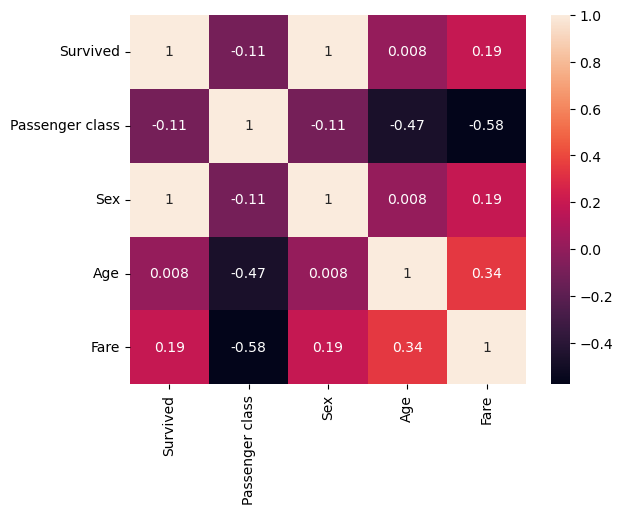

In [135]:
#explore correlation among variables in a heatmap
correlation = copy.corr()
sns.heatmap(correlation, annot=True)

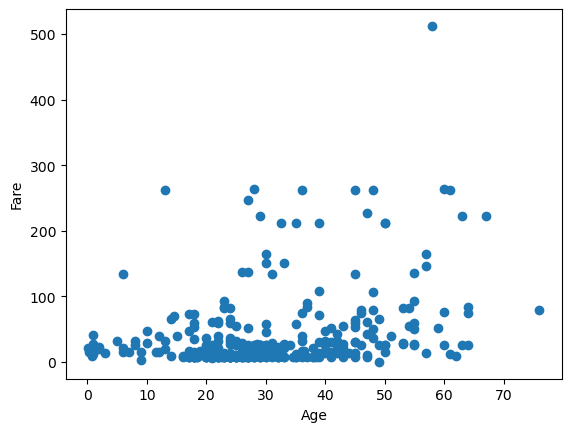

In [189]:
#you can make a scatter plot by each pair using the code below, but it can be take time especially if you have lots of columns.
plt.scatter(x=copy['Age'], y=copy['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

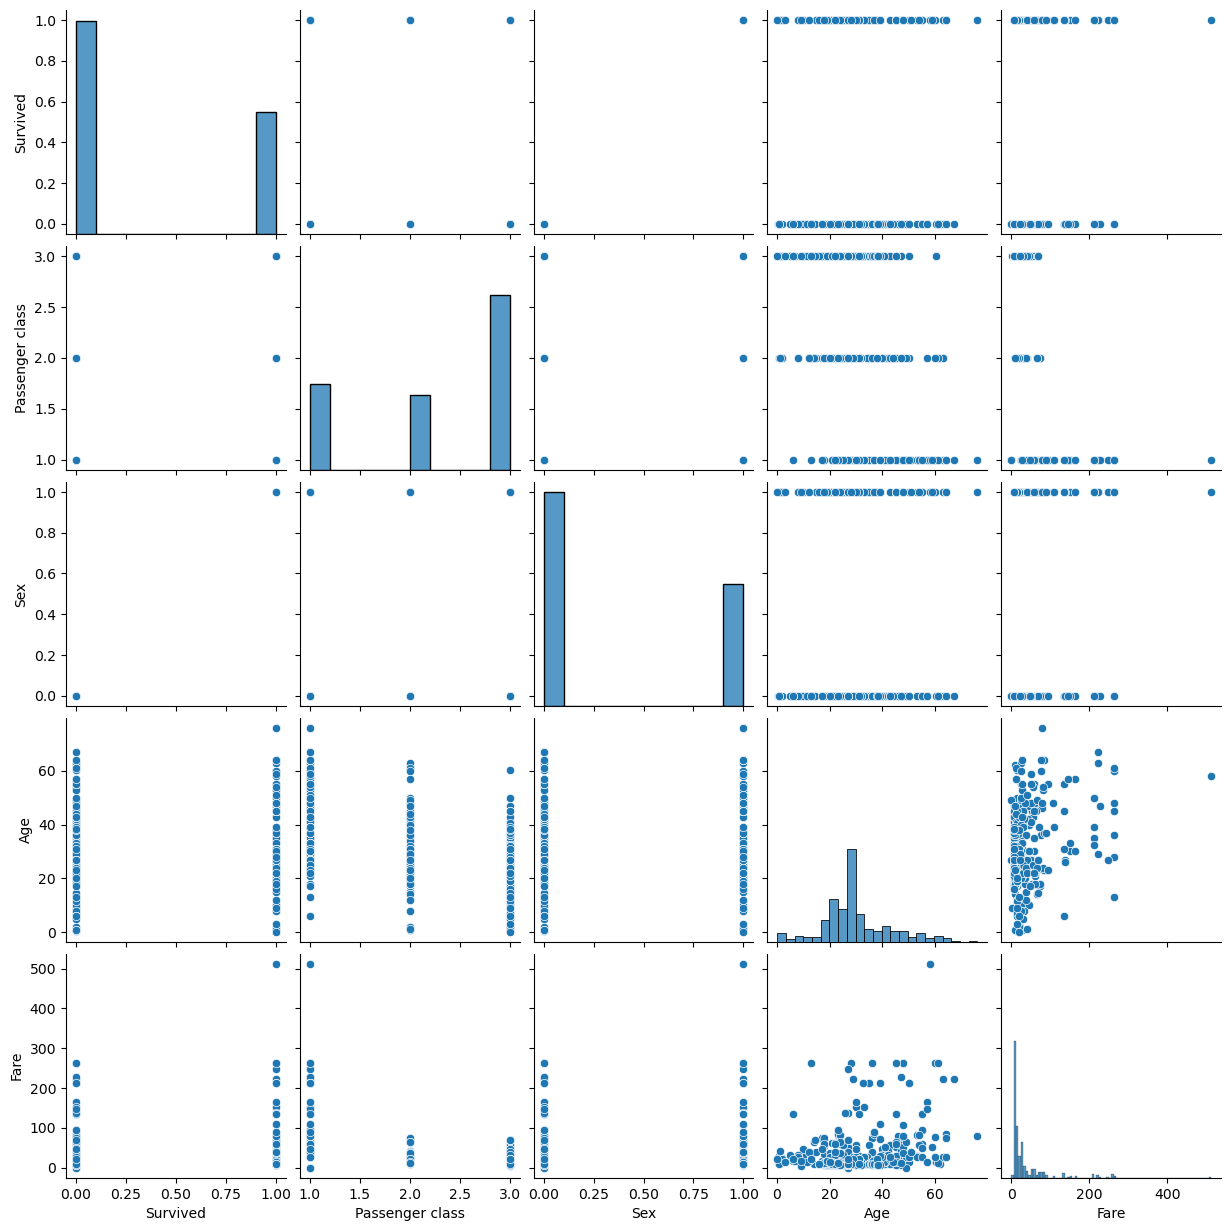

In [136]:
#This creates a figure for each pair and plots them, it does take a while so a limited number of features is recommended
#The above scatter plot can be found on the plot below
sns.pairplot(copy)

## Conclusion

EDA allows the data to reveal aspects of itself that may not have been obvious. EDA's overarching goal is to better understand the data and prepare it for analysis. EDA is not linear, but rather iterative as the above goals of EDA - Data Understanding, Data Cleaning, and Feature Analysis - can be done together; these goals do not occur in a vaccuum. For instance, I performed Feature Analysis to identify outliers in the data understanding phase and I performed Data Cleaning in the Data Understanding part as well. EDA is the most crucial step in data analysis and it is equally important to remember that EDA is an iterative process, not a linear process.

## References

1. [What is Exploratory Data Analysis? | IBM](https://www.ibm.com/topics/exploratory-data-analysis)
2. [What is Exploratory Data Analysis? Steps and Market Analysis | Simplilearn](https://www.simplilearn.com/tutorials/data-analytics-tutorial/exploratory-data-analysis)
3. [4 Steps for Exploratory Data Analysis | EDA Techniques (quanthub.com)](https://www.quanthub.com/what-are-the-steps-in-eda/)
4. [An Extensive Step by Step Guide to Exploratory Data Analysis | by Terence Shin | Towards Data Science (archive.org)](https://web.archive.org/web/20230523083940/https:/towardsdatascience.com/an-extensive-guide-to-exploratory-data-analysis-ddd99a03199e?gi=9eab35dc2721)
5. [Top Techniques to Handle Missing Values Every Data Scientist Should Know | DataCamp](https://www.datacamp.com/tutorial/techniques-to-handle-missing-data-values)
6. https://mosaicdatascience.com/2014/03/03/data-science-design-pattern-3-handling-null-values/ 
7. https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/ 
8. https://statisticsbyjim.com/basics/remove-outliers/
9. https://www.analyticsvidhya.com/blog/2021/07/how-to-treat-outliers-in-a-data-set/ 
10. https://www.geeksforgeeks.org/what-is-feature-engineering/ 
11. https://www.stat.cmu.edu/~hseltman/309/Book/chapter4.pdf 
12. [pandas documentation — pandas 2.1.1 documentation (pydata.org)](https://pandas.pydata.org/docs/index.html)
13. [matplotlib.pyplot — Matplotlib 3.8.0 documentation](matplotlib.pyplot — Matplotlib 3.8.0 documentation)
14. [seaborn: statistical data visualization — seaborn 0.13.0 documentation (pydata.org)](https://seaborn.pydata.org/)
15. [How to Remove Outliers for Machine Learning - MachineLearningMastery.com](https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/)
